# Importing Libraries

In [2]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [3]:
cd

C:\Users\91952


# Importing train dataset

In [4]:
loan_df=pd.read_csv('train_loan.csv')

# Exploratory data analysis

In [5]:
loan_df.shape

(614, 13)

In [59]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515


In [7]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
loan_df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [9]:
loan_df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

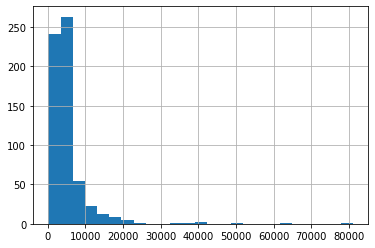

In [10]:
loan_df['ApplicantIncome'].hist(bins=25)

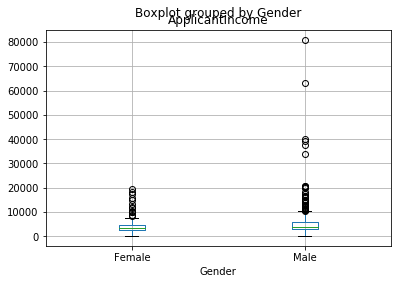

In [11]:
loan_df.boxplot(column='ApplicantIncome',by='Gender')


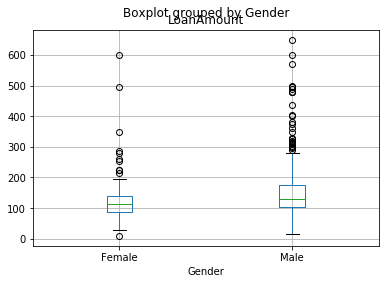

In [12]:
loan_df.boxplot(column='LoanAmount',by='Gender')


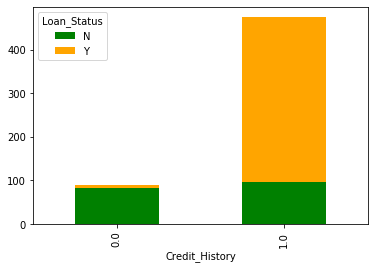

In [13]:
cross_tab=pd.crosstab(loan_df['Credit_History'],loan_df['Loan_Status'])
cross_tab.plot(kind='bar',stacked=True,color=['Green','Orange'],grid=False)

# Checkin for null values

In [14]:
loan_df.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Replacing the null values

In [15]:
 loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].mean(),inplace=True)

In [16]:
loan_df['Self_Employed'].fillna('No',inplace=True)

In [17]:
 loan_df['LoanAmount_log'] = np.log(loan_df['LoanAmount'])#to treat extremities in the loan amount


In [18]:
loan_df['TotalIncome']=loan_df['ApplicantIncome']+loan_df['CoapplicantIncome']

In [19]:
loan_df['TotalIncome_log']=np.log(loan_df['TotalIncome'])#to treat extremities in the loan amount

In [20]:
loan_df['Gender'].fillna(loan_df['Gender'].mode()[0], inplace=True)
loan_df['Married'].fillna(loan_df['Married'].mode()[0], inplace=True)
loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0], inplace=True)
loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mode()[0], inplace=True)
loan_df['Credit_History'].fillna(loan_df['Credit_History'].mode()[0], inplace=True)

In [21]:
loan_df.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [40]:
loan_df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

# Convertin non-numeric values into numeric

In [22]:
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le=LabelEncoder()
for i in var_mod:
    loan_df[i]=le.fit_transform(loan_df[i])
    


In [23]:
loan_df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [24]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515


# Training the RandonForestClassifier Model

In [71]:
model = RandomForestClassifier(n_estimators=100,criterion='gini', random_state=0)
outcome_var=loan_df['Loan_Status']
predictor_var = loan_df[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']]

#Fitting the model
model.fit(predictor_var,outcome_var)

#Make predictions on training set:
predictions = model.predict(predictor_var)
  
#Print accuracy
accuracy = metrics.accuracy_score(predictions,outcome_var)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

cross_score=cross_val_score(model,predictor_var,outcome_var,cv=5)
print("Cross validation score= %s" % "{0:.3%}".format(cross_score.mean()))

Accuracy : 100.000%
Cross validation score= 78.178%


# Create a series with feature importances:

In [61]:
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']

featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

Credit_History      0.275484
TotalIncome_log     0.260961
LoanAmount_log      0.224815
Dependents          0.052024
Property_Area       0.048259
Loan_Amount_Term    0.042106
Married             0.026257
Education           0.025932
Self_Employed       0.022091
Gender              0.022073
dtype: float64


# Visualizing the feature importances

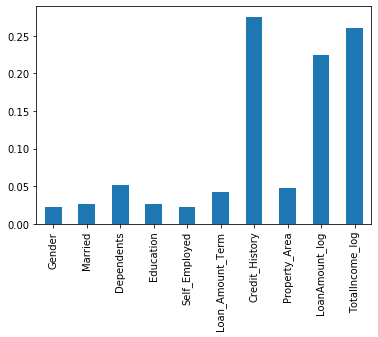

In [62]:
(pd.Series(model.feature_importances_, index=predictor_var).plot(kind='bar')) 

In [63]:
#selecting the top four important features
top_features=loan_df[['Credit_History','TotalIncome_log','LoanAmount_log','Property_Area']]

In [73]:
model.fit(top_features,outcome_var)

#Make predictions on training set:
predictions = model.predict(top_features)
  
#Print accuracy
accuracy = metrics.accuracy_score(predictions,outcome_var)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 100.000%


In [74]:
cross_score=cross_val_score(model,top_features,outcome_var,cv=5)
print("Cross validation score= %s" % "{0:.3%}".format(cross_score.mean()))

Cross validation score= 77.040%


In [66]:
#importing test dataset
test_loan = pd.read_csv('test_loan.csv')

In [35]:
#checking for null values in test dataset
test_loan.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [36]:
#replacing the null values
test_loan['LoanAmount'].fillna(loan_df['LoanAmount'].mean(),inplace=True)
test_loan['Self_Employed'].fillna('No',inplace=True)
test_loan['LoanAmount_log'] = np.log(loan_df['LoanAmount'])#to treat extremities in the loan amount
test_loan['TotalIncome']=loan_df['ApplicantIncome']+loan_df['CoapplicantIncome']
test_loan['TotalIncome_log']=np.log(loan_df['TotalIncome'])#to treat extremities in the loan amount
test_loan['TotalIncome_log']=np.log(loan_df['TotalIncome'])#to treat extremities in the loan amount
test_loan['Gender'].fillna(loan_df['Gender'].mode()[0], inplace=True)
test_loan['Married'].fillna(loan_df['Married'].mode()[0], inplace=True)
test_loan['Dependents'].fillna(loan_df['Dependents'].mode()[0], inplace=True)
test_loan['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mode()[0], inplace=True)
test_loan['Credit_History'].fillna(loan_df['Credit_History'].mode()[0], inplace=True)
test_loan.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [46]:
#converting to numeric values
var= ['Property_Area']
labenc=LabelEncoder()
for i in var:
   test_loan[i]=labenc.fit_transform(test_loan[i])
    
    

In [47]:
test_loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [50]:
#predicting on the new test dataset
top_features_test=loan_df[['Credit_History','TotalIncome_log','LoanAmount_log','Property_Area']]
predictions_test = model.predict(top_features_test)

In [51]:
print(predictions_test)

[1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0
 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1
 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1
 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1
 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1
 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 0 0 1 0 1 1 1 